In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Display only 2 decimals on pandas data frames
pd.options.display.float_format = '{:.2f}'.format

# Display all cell results (not only last one)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We're gonna simulate the following linear relationship:

$ y_i = \beta_0 + \beta_1 x_i + \epsilon_i$

$ y_i = 2 + 5 x_i + \epsilon_i$

In our simulation, $x$ can assume any value between 0 and 1 and $\epsilon$ follows a normal distribution with mean equals to zero and variance to 1 (standard normal distributiom).

In [9]:
# Simulando epsilon
np.random.seed(123)
epsilon = np.random.normal(loc = 0,scale = 1, size = 500)
epsilon[0:4]

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471])

In [13]:
# Simulando X
np.random.seed(123)
x = np.random.uniform(low=0, high=1, size=500)
x[0:4]

array([0.69646919, 0.28613933, 0.22685145, 0.55131477])

In [16]:
# Definindo b0 e b1
b0 = 2
b1 = 5

In [17]:
y = b0 + b1*x + epsilon

/home/cayan/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


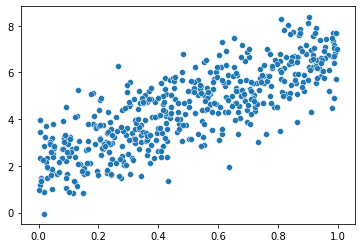

In [18]:
sns.scatterplot(x, y)

Let's recall the algorithm specification:

$\beta^{(i+1)} = \beta^{(i)} - \alpha\frac{-2}{n}X'(Y - X\beta^{(i)})$

This means that the previous value of $\beta$ will be used at the next step.

Step 1:
<br>
$\beta^{(1)} = \beta^{(0)} - \alpha\frac{-2}{n}X'(Y - X\beta^{(0)})$

Step 2:
<br>
$\beta^{(2)} = \beta^{(1)} - \alpha\frac{-2}{n}X'(Y - X\beta^{(1)})$

Step 3:
<br>
$\beta^{(3)} = \beta^{(2)} - \alpha\frac{-2}{n}X'(Y - X\beta^{(2)})$

$\vdots$

$\beta^{(i+1)} = \beta^{(i)} - \alpha\frac{-2}{n}X'(Y - X\beta^{(i)})$
<br>

---

#### But first, we need to our matrix X and vector Y

<br>

$$\Large Y = XB + \epsilon$$

$$
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n \\
\end{bmatrix} 
=
\begin{bmatrix}
1 & x_{11}\\ 1 & x_{12} \\ \vdots & \vdots \\ 1 & x_{1n} \\
\end{bmatrix}
\times
\begin{bmatrix}
\beta_0 \\ \beta_1 \\
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \\
\end{bmatrix}
$$

In [24]:
vec_y = y.reshape(-1, 1)
print('vetor Y')
vec_y[0:5]

vetor Y


array([[4.39671532],
       [4.42804212],
       [3.41723577],
       [3.25027913],
       [5.0187446 ]])

In [45]:
coluna_um = np.ones(5)
coluna_x  = x[0:5]

In [48]:
coluna_um
coluna_x
print('\n')

np.vstack( (coluna_um, coluna_x) )
print('\n')
np.vstack( (coluna_um, coluna_x) ).T

array([1., 1., 1., 1., 1.])

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897])

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897]])

array([[1.        , 0.69646919],
       [1.        , 0.28613933],
       [1.        , 0.22685145],
       [1.        , 0.55131477],
       [1.        , 0.71946897]])

In [42]:
#x[0:5]
#np.ones(5), x[0:5]

np.vstack((np.ones(5), x[0:5]))
print('\n')
np.vstack((np.ones(5), x[0:5])).T

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897]])

array([[1.        , 0.69646919],
       [1.        , 0.28613933],
       [1.        , 0.22685145],
       [1.        , 0.55131477],
       [1.        , 0.71946897]])

In [56]:
mat_x = np.vstack((np.ones(500), x)).T
print('matriz X')
mat_x[0:5]

matriz X


array([[1.        , 0.69646919],
       [1.        , 0.28613933],
       [1.        , 0.22685145],
       [1.        , 0.55131477],
       [1.        , 0.71946897]])

In [58]:
beta = np.array([0, 0]).reshape(-1, 1)
print('beta')
beta

beta


array([[0],
       [0]])

In [84]:
alpha = 0.1

$\beta^{(i+1)} = \beta^{(i)} - \alpha\frac{-2}{n}X'(Y - X\beta^{(i)})$

In [64]:
#mat_x.T.dot(vec_y - mat_x.dot(beta))

# Multiplicacao Matricial 
X.dot(beta)

In [67]:
0.1 * (-2/500) * mat_x.T.dot( vec_y -  mat_x.dot(beta)  )

array([[-0.88670859],
       [-0.51596772]])

In [77]:
# numero de linhas: 500
# alpha: 0.1
erro1 = vec_y - mat_x.dot(beta)
erro1[0]

array([4.39671532])

In [80]:
beta - (0.1 * (-2/500) *mat_x.T.dot(erro1))

array([[0.88670859],
       [0.51596772]])

In [82]:
def grad(x, y, beta):
    
    n = x.shape[0]
    erro_i = y - x.dot(beta)
    gradiente = (-2/n) * x.T.dot(erro_i)
    
    return gradiente

$\beta^{(1)} = \beta^{(0)} - \alpha \frac{-2}{n}X'(Y - X\beta^{(0)})$

$\beta^{(2)} = \beta^{(1)} - \alpha \frac{-2}{n}X'(Y - X\beta^{(1)})$

$\beta^{(3)} = \beta^{(2)} - \alpha \frac{-2}{n}X'(Y - X\beta^{(2)})$

$\beta^{(4)} = \beta^{(3)} - \alpha \frac{-2}{n}X'(Y - X\beta^{(3)})$

In [85]:
beta_t1 = beta - alpha * grad(x=mat_x, y=vec_y, beta=beta)
beta_t1

array([[0.88670859],
       [0.51596772]])

In [86]:
beta_t2 = beta_t1 - alpha * grad(x=mat_x, y=vec_y, beta=beta_t1)
beta_t2

array([[1.54505271],
       [0.91058213]])

In [87]:
beta_t3 = beta_t2 - alpha * grad(x=mat_x, y=vec_y, beta=beta_t2)
beta_t3

array([[2.03270559],
       [1.21434439]])

In [88]:
beta_t4 = beta_t3 - alpha * grad(x=mat_x, y=vec_y, beta=beta_t3)
beta_t5 = beta_t4 - alpha * grad(x=mat_x, y=vec_y, beta=beta_t4)
beta_t6 = beta_t5 - alpha * grad(x=mat_x, y=vec_y, beta=beta_t5)
beta_t7 = beta_t6 - alpha * grad(x=mat_x, y=vec_y, beta=beta_t6)
beta_t7

array([[2.99143081],
       [1.89907886]])

In [92]:
beta_lista = []
beta_it0 = beta

for i in range(1500):
    beta_it1 = beta_it0 - alpha * grad(x=mat_x, y=vec_y, beta=beta_it0)
    beta_it0 = beta_it1
    beta_lista.append(beta_it0)

In [90]:
b0, b1

(2, 5)

In [93]:
beta_lista[10]
beta_lista[50]
beta_lista[150]
beta_lista[450]
beta_lista[1450]

array([[3.24432323],
       [2.20157441]])

array([[2.86178467],
       [3.28010776]])

array([[2.29916925],
       [4.34421037]])

array([[2.09413553],
       [4.73199973]])

array([[2.08996971],
       [4.73987872]])

In [53]:
y_pred = []
y_pred.append(beta_lista[20][0] + beta_lista[20][1]*x)
y_pred.append(beta_lista[90][0] + beta_lista[90][1]*x)

In [40]:
import matplotlib.pyplot as plt

In [62]:
del fig, ax

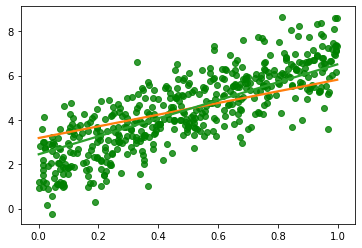

In [64]:
fig, ax = plt.subplots()
#sns.relplot(x=x, y=y)
sns.regplot(x=x, y=y, fit_reg=False, ax=ax,scatter_kws={"color": "green"})
sns.regplot(x=x, y=y_pred[0],scatter=False, ax=ax, scatter_kws={"color": "yellow"})
sns.regplot(x=x, y=y_pred[1],scatter=False, ax=ax, scatter_kws={"color": "red"})
plt.show()

In [ ]:
p1 = sns.relplot(kind='scatter', x='x', y='y', data=df, height=3.5, aspect=1.5)
p1.map_dataframe(sns.lineplot, 'x', 'y_line', color='g')